# Import Packages


In [1]:
# Import Packages
##### Tensorflow #####
import tensorflow as tf
##### Image Processing Tools #####
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt
##### Other Packages #####
import random
import math

2025-01-10 23:27:22.237037: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-10 23:27:22.242450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 23:27:22.248498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 23:27:22.250898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 23:27:22.256111: I tensorflow/core/platform/cpu_feature_guar

---

# Image Edge detection


Import the MNIST dataset


In [2]:
mnist = tf.keras.datasets.mnist
# Raw Data [0, 255]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Float Converted Data (between 0 and 1)
x_train_float, x_test_float = (x_train / 255.0), (x_test / 255.0)
# Convert to black and white images
x_ceil_train, x_ceil_test = np.round(
    (x_train / 255.0)), np.round((x_test / 255.0))

## Data visualization


In [3]:
# Choose random image
r_int = random.randint(0, 500)
sample = x_train[r_int]
num_samples = 100
LIMIT = 10
LIMIT_RANGE = range(0, 10)

################################################################################
# Digit list 0 -> 9
################################################################################


def get_random_samples(sample_range, num_samples):
    # Get a sample of each digit
    sample_array = np.empty((10, num_samples, 28, 28), dtype=np.uint8)
    # Dict for checking if the digit has already been found
    # Key is the number, value is the count it has been found
    label_count = {}
    # Dict for storing checked indices so we don't repeat an image
    # key = label, value = indice
    checked = {}
    # Init the dicts
    for i in range(0, 10):
        label_count[i] = 0
        checked[i] = set()
    # Choose an initial random index
    r_index = random.randint(0, sample_range)
    ##### Work Loop #####
    # Reset r_index and check that it hans't been checked yet.
    # Also check that the label hasn't already been found.
    # Run until all 10 digits are found
    while sum(label_count.values()) < num_samples*10:
        sample_label = y_train[r_index]
        if r_index not in checked[sample_label] and label_count[sample_label] < num_samples:
            sample_digit = x_train[r_index]
            sample_label = y_train[r_index]
            sample_array[sample_label][label_count[sample_label]] = sample_digit
            label_count[y_train[r_index]] += 1
            checked[sample_label].add(r_index)
        r_index = random.randint(0, sample_range)
    return checked, sample_array


checked, sample_array = get_random_samples(59999, num_samples)
################################################################################

(10, 100, 28, 28)


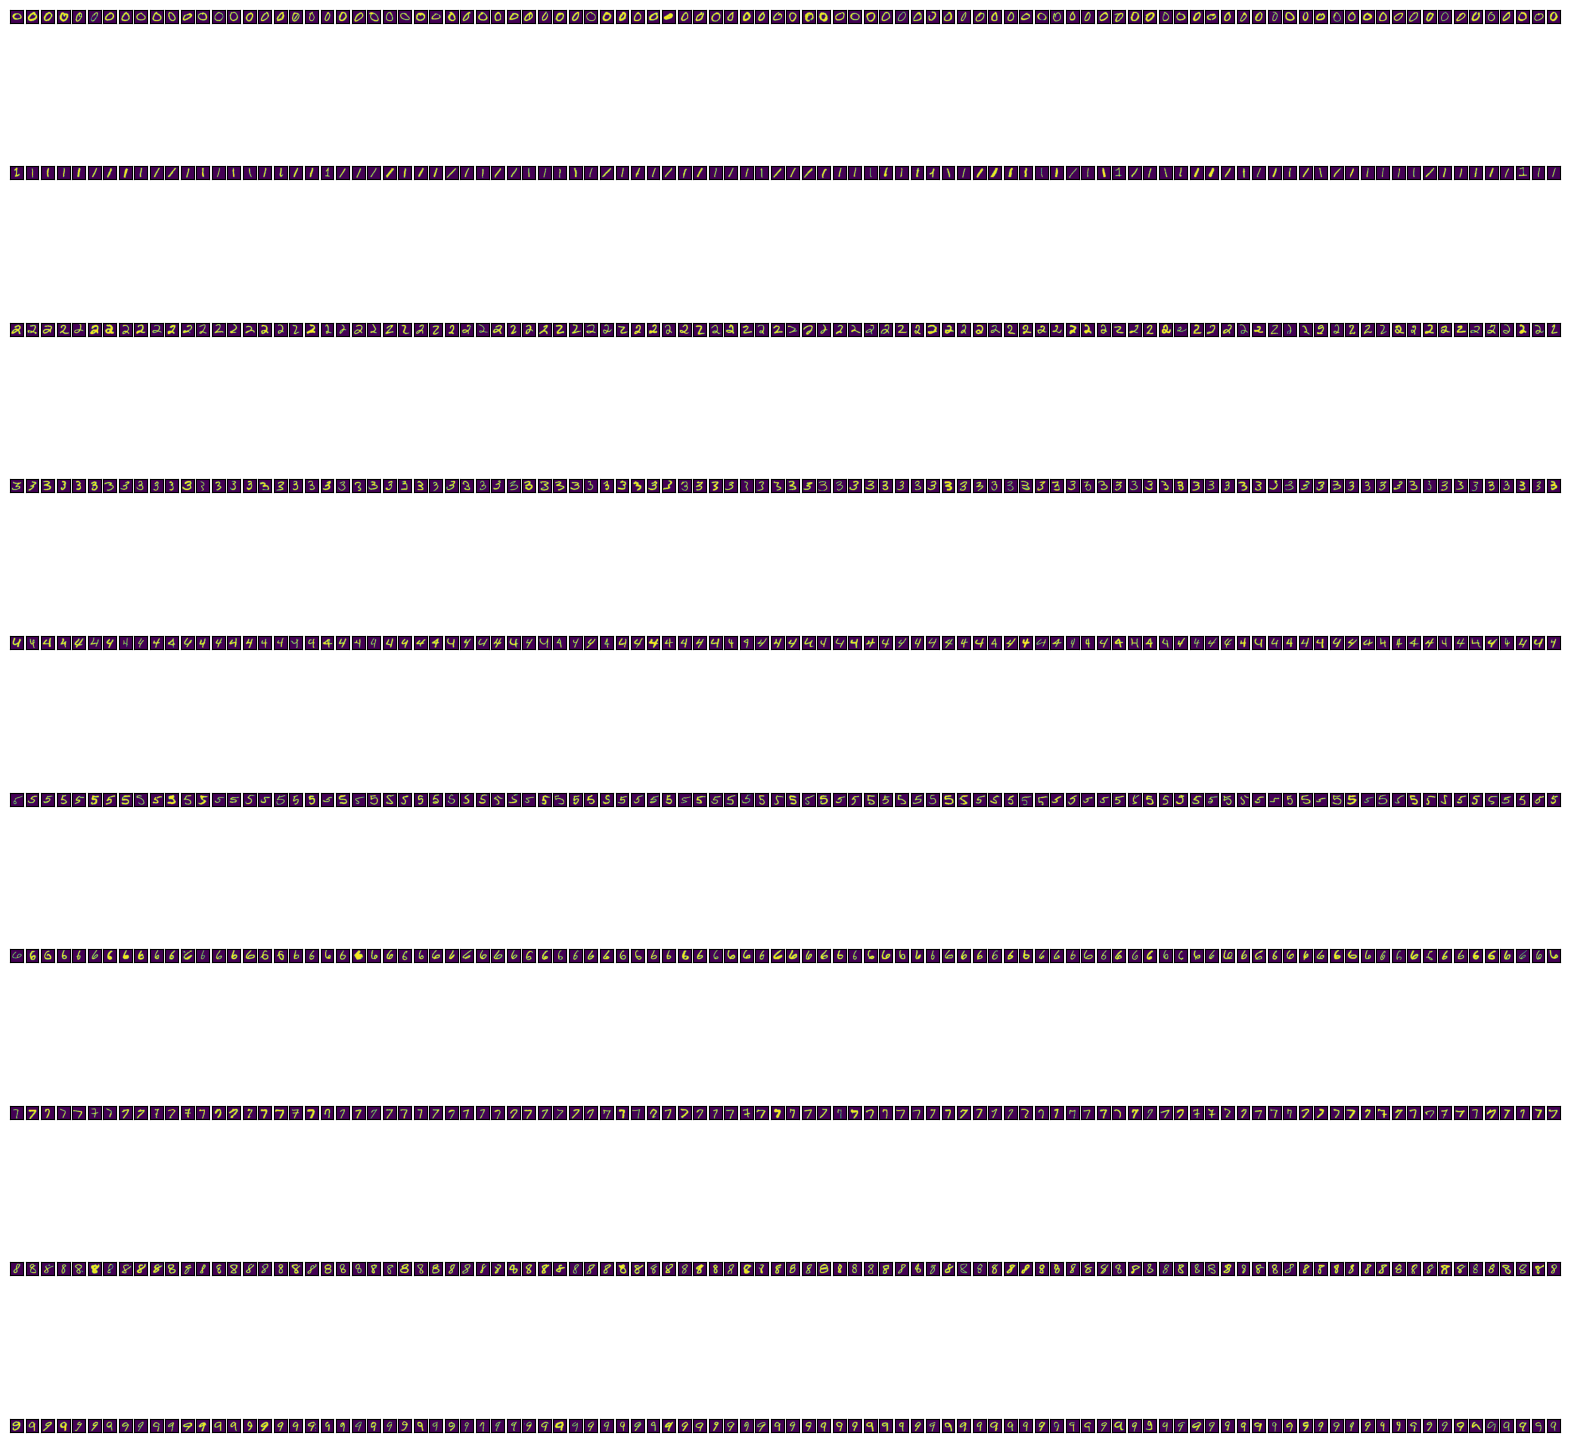

In [4]:
# Sanity Check
print(sample_array.shape)
fig, axs = plt.subplots(10, num_samples, figsize=(20, 20))
plt.setp(axs.flat, xticks=[], yticks=[])
for i in range(0, 10):
    for j in range(0, num_samples):
        if num_samples > 1:
            axs[i][j].imshow(sample_array[i][j])
        else:
            axs[i].imshow(sample_array[i][j])

plt.show()

## Image Preprocessing


### Perform Edge Detection


In [5]:
# Build in Edge Detection
sample_edges = cv.Canny(sample, 100, 200)

################################################################################
# Digit list 0 -> 9
################################################################################
sample_array_edges = np.empty((10, num_samples, 28, 28), dtype=np.uint8)
for i in range(0, 10):
    for j in range(0, num_samples):
        sample_array_edges[i][j] = cv.Canny(sample_array[i][j], 100, 200)
################################################################################

## Capture the x, y cooridinates of the edges.


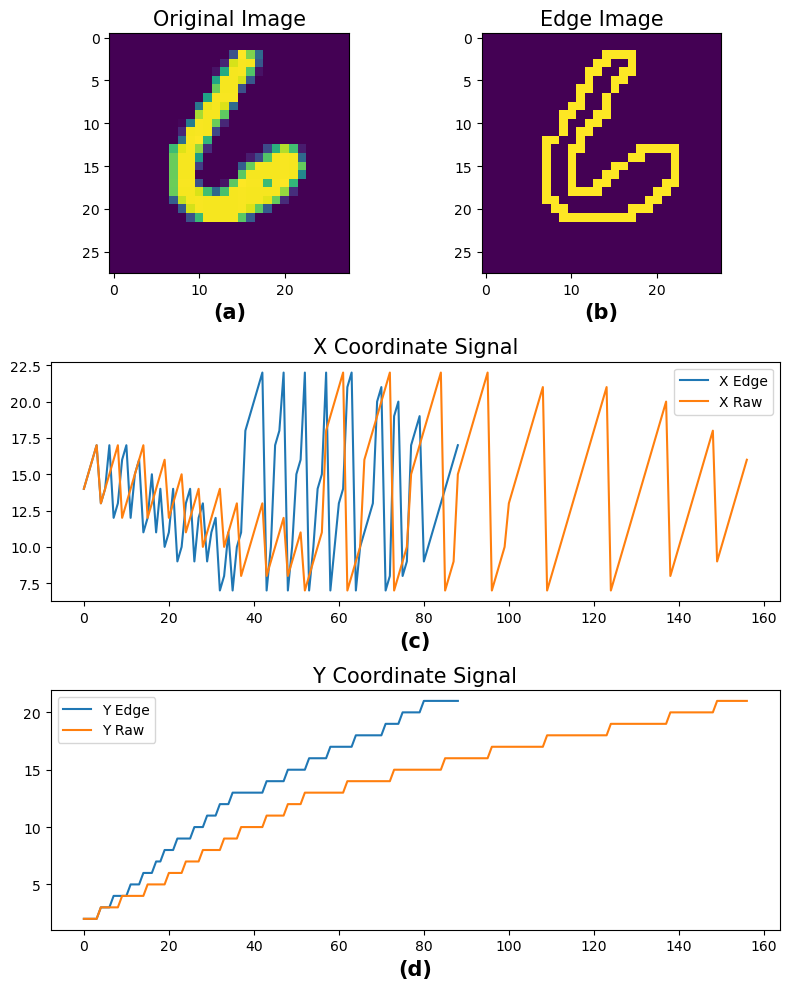

In [6]:
################################################################################
# Edge coordinate algorithm
################################################################################
def get_coords(image):
    x = []
    y = []
    edge_threshold = 0
    for row in range(0, len(image)):
        for col in range(0, len(image[row])):
            if image[row][col] > edge_threshold:
                x.append(col)
                y.append(row)
    return x, y


# One sample
sample_x, sample_y = get_coords(sample_edges)
a_raw_x, a_raw_y = get_coords(sample)

################################################################################
# Print single sample
fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(3, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])

ax1.imshow(sample)
ax1.set_title('Original Image', size=15)
ax1.set_xlabel('(a)', size=15, fontdict={'fontweight': 'bold'})

ax2.imshow(sample_edges)
ax2.set_title('Edge Image', size=15)
ax2.set_xlabel('(b)', size=15, fontdict={'fontweight': 'bold'})

ax3.plot(sample_x, label='X Edge')
ax3.plot(a_raw_x, label='X Raw')
ax3.set_title('X Coordinate Signal', size=15)
ax3.set_xlabel('(c)', size=15, fontdict={'fontweight': 'bold'})
ax3.legend()


ax4.plot(sample_y, label='Y Edge')
ax4.plot(a_raw_y, label='Y Raw')
ax4.set_title('Y Coordinate Signal', size=15)
ax4.set_xlabel('(d)', size=15, fontdict={'fontweight': 'bold'})
ax4.legend()


fig.add_axes(ax1)
fig.add_axes(ax2)
fig.add_axes(ax3)
fig.add_axes(ax4)

# plt.setp(fig.axes, xticks=[], yticks=[])
plt.tight_layout()
plt.savefig('x_y_edges_image.png')
################################################################################
# Digit list 0 -> 9
################################################################################
digits_x = {}
digits_y = {}
raw_x = {}
raw_y = {}
# Init dicts
for i in range(0, 10):
    digits_x[i] = []
    digits_y[i] = []
    raw_x[i] = []
    raw_y[i] = []

# Get the coords
for i in range(0, 10):
    for j in range(0, num_samples):
        x, y = get_coords(sample_array_edges[i][j])
        raw_x_l, raw_y_l = get_coords(sample_array[i][j])
        digits_x[i].append(x)
        digits_y[i].append(y)
        raw_x[i].append(raw_x_l)
        raw_y[i].append(raw_y_l)
################################################################################

In [7]:
################################################################################
# Get average signal length for raw and edges for each digit
################################################################################
x_len_raw = []
y_len_raw = []
x_len_edge = []
y_len_edge = []

for i in range(0, len(raw_x)):
    for j in range(0, 100):
        x_len_raw.append(len(raw_x[i][j]))
        y_len_raw.append(len(raw_y[i][j]))
        x_len_edge.append(len(digits_x[i][j]))
        y_len_edge.append(len(digits_y[i][j]))

x_reduc = []
y_reduc = []

for i in range(0, len(x_len_raw)):
    x_ratio = (x_len_raw[i] - x_len_edge[i]) / x_len_raw[i]
    y_ratio = (y_len_raw[i] - y_len_edge[i]) / y_len_raw[i]
    x_reduc.append(x_ratio)
    y_reduc.append(y_ratio)

x_perc_reduc = 0.0
y_perc_reduc = 0.0
for i in range(0, len(x_reduc)):
    x_perc_reduc += x_reduc[i]
    y_perc_reduc += y_reduc[i]

x_perc_reduc = x_perc_reduc / len(x_reduc)
y_perc_reduc = y_perc_reduc / len(y_reduc)
print(x_perc_reduc)
print(y_perc_reduc)

0.4196494126650496
0.4196494126650496


---

# Encoding


In [8]:
################################################################################
# SF encoding
################################################################################


def sf_encode(s_signal, threshold):
    out = np.zeros(len(s_signal))
    base = s_signal[0]
    for t in range(1, len(s_signal)):
        if s_signal[t] > base + threshold:
            out[t] = 1
            base = base + threshold
        elif s_signal[t] < base - threshold:
            out[t] = -1
            base = base - threshold
    return out


################################################################################
# TBR
################################################################################


def tbr_encode(s_signal, f):
    startpoint = s_signal[0]
    diff = np.zeros((len(s_signal), 1))
    for t in range(len(s_signal)-1):
        diff[t] = s_signal[t+1] - s_signal[t]
    diff[-1] = diff[-2]
    threshold = f
    out = np.zeros(len(s_signal))
    for t in range(len(s_signal)):
        if diff[t] > threshold:
            out[t] = 1
        elif diff[t] < -threshold:
            out[t] = -1
    return out


################################################################################
# Moving Window
################################################################################


def mw_encode(s_signal, threshold, window):
    out = np.zeros(len(s_signal))
    base = np.mean(s_signal[0:window+1])
    for t in range(window+1):
        if s_signal[t] > base + threshold:
            out[t] = 1
        elif s_signal[t] < base-threshold:
            out[t] = -1

    for t in range(window+1, len(s_signal)):
        base = np.mean(s_signal[t-window-1:t])
        if s_signal[t] > base + threshold:
            out[t] = 1
        elif s_signal[t] < base-threshold:
            out[t] = -1
        return out


################################################################################
# Decoding
################################################################################


def decode(spikes, threshold, startpoint):
    recon = np.zeros(len(spikes))
    recon[0] = startpoint
    for i in range(1, len(spikes)):
        if spikes[i] == 1:
            recon[i] = recon[i-1] + threshold
        elif spikes[i] == -1:
            recon[i] = recon[i-1] - threshold
        else:
            recon[i] = recon[i-1]
    return recon


################################################################################
# Adaptive Encoding
################################################################################


def ada_encode(s_signal, threshold):
    base = s_signal[0]
    count = np.zeros(len(s_signal)-1).astype(np.int32)
    for i in range(len(s_signal)-1):
        count[i] = np.ceil(np.abs((s_signal[i+1] - s_signal[i])/threshold))
    s_a = np.zeros(np.sum(count)+1)
    n = 0
    for i in range(len(s_signal)-1):
        for j in range(count[i]):
            s_a[n] = s_signal[i] + j/count[i] * (s_signal[i+1]-s_signal[i])
            n += 1
    s_a[-1] = s_signal[-1]
    return s_a, count


################################################################################
# Adaptive Decoding
################################################################################

def ada_decode(recon_a, count):
    m = 0
    recon = np.zeros(len(count)+1)
    for i in range(len(count)):
        recon[i] = recon_a[m]
        m += count[i]
    recon[-1] = recon_a[-1]
    return recon

################################################################################
# Digit list 0 -> 9
################################################################################


def simulate(sample_rate_threshold, encode_threshold, digits_x, digits_y):
    window = 0
    f = 1
    x_spiketrains = {}
    y_spiketrains = {}
    x_recon = {}
    y_recon = {}
    x_tbr_spiketrains = {}
    y_tbr_spiketrains = {}
    x_tbr_recon = {}
    y_tbr_recon = {}
    # Init dicts
    for i in range(0, 10):
        x_spiketrains[i] = []
        y_spiketrains[i] = []
        x_recon[i] = []
        y_recon[i] = []
        x_tbr_spiketrains[i] = []
        y_tbr_spiketrains[i] = []
        x_tbr_recon[i] = []
        y_tbr_recon[i] = []
    # Encode and decode
    for i in LIMIT_RANGE:
        for j in range(0, num_samples):
            start_x = digits_x[i][j][0]
            start_y = digits_y[i][j][0]
            # New Signals
            x_signal_ada, x_count = ada_encode(
                digits_x[i][j], sample_rate_threshold)
            y_signal_ada, y_count = ada_encode(
                digits_y[i][j], sample_rate_threshold)
            # New encoded
            x_encoded = sf_encode(x_signal_ada, encode_threshold)
            y_encoded = sf_encode(y_signal_ada, encode_threshold)
            # TODO: Add tbr and mw here
            x_encoded_tbr = tbr_encode(x_signal_ada, encode_threshold)
            y_encoded_tbr = tbr_encode(y_signal_ada, encode_threshold)
            # x_encoded_mw = mw_encode(x_signal_ada, threshold, window)
            # y_encoded_mw = mw_encode(y_signal_ada, threshold, window)
            # Decode
            x_decoded = decode(x_encoded, encode_threshold, start_x)
            y_decoded = decode(y_encoded, encode_threshold, start_y)
            x_decoded_tbr = decode(x_encoded_tbr, encode_threshold, start_x)
            y_decoded_tbr = decode(y_encoded_tbr, encode_threshold, start_y)
            # x_decoded_mw = decode(x_encoded_mw, encode_threshold, start_x)
            # y_decoded_mw = decode(y_encoded_mw, encode_threshold, start_y)
            # Recon Signal
            x_recon_signal = ada_decode(x_decoded, x_count)
            y_recon_signal = ada_decode(y_decoded, y_count)
            x_recon_tbr = ada_decode(x_decoded_tbr, x_count)
            y_recon_tbr = ada_decode(y_decoded_tbr, y_count)
            # Store the results
            x_spiketrains[i].append(x_encoded)
            y_spiketrains[i].append(y_encoded)
            x_recon[i].append(x_recon_signal)
            y_recon[i].append(y_recon_signal)
            x_tbr_spiketrains[i].append(x_encoded_tbr)
            y_tbr_spiketrains[i].append(y_encoded_tbr)
            x_tbr_recon[i].append(x_recon_tbr)
            y_tbr_recon[i].append(y_recon_tbr)
    sf_results = (x_spiketrains, y_spiketrains, x_recon, y_recon)
    tbr_results = (x_tbr_spiketrains, y_tbr_spiketrains,
                   x_tbr_recon, y_tbr_recon)
    return sf_results, tbr_results

In [ ]:
# Create ranges to test
sample_rate_thresholds = np.around(np.arange(.1, 2.1, .1), 1).tolist()
encode_thresholds = np.around(np.arange(.1, 2.1, .1), 1).tolist()

print(sample_rate_thresholds)
print(encode_thresholds)
results = []
for i in sample_rate_thresholds:
    for j in encode_thresholds:
        # x_spiketrains, y_spiketrains, x_recon, y_recon = simulate(i,j,digits_x,digits_y)
        sf_results, tbr_results = simulate(i, j, digits_x, digits_y)
        # results.append((i,j,(x_spiketrains,y_spiketrains,x_recon,y_recon)))
        results.append((i, j, sf_results, tbr_results))

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]


In [ ]:
################################################################################
# Compute RMSE
################################################################################


def get_rmse(orig_signal, recon_signal):
    ret_val = 0.0
    if len(orig_signal) != len(recon_signal):
        print('Error: signals different length')
        ret_val = -1.0
    else:
        sum = 0
        for i in range(0, len(orig_signal)):
            tmp_diff = recon_signal[i] - orig_signal[i]
            sum += tmp_diff ** 2
        ret_val = np.sqrt(sum/len(orig_signal))
    return ret_val


################################################################################
# Compute AFR
################################################################################


def get_afr(spiketrain):
    spike_count = 0
    for i in spiketrain:
        if i != 0:
            spike_count += 1
    return (spike_count / len(spiketrain)), spike_count


################################################################################
# Compute SNR
################################################################################

def get_snr(orig_signal, recon_signal):
    snr = 0.0
    if len(orig_signal) != len(recon_signal):
        print('Error: signals different length')
        snr = -1.0
    else:
        P_s = 1/len(x) * np.sum(np.power(orig_signal, 2))
        P_sr = 1/len(x) * np.sum(np.power(orig_signal-recon_signal, 2))
        snr = 20 * math.log10(P_s/P_sr)
    return snr


################################################################################
# Compute Fitness Metric
################################################################################


def get_fitness(rmse_array, snr_array, spikec_array):
    ret_val_x = []
    ret_val_y = []
    if len(rmse_array) != len(snr_array) and len(snr_array) != spikec_array:
        print('Error: Size mismatch')
    else:
        # Compute fitness
        for i in range(0, len(rmse_array)):
            fitness_x = snr_array[i][0] / (rmse_array[i][0]*spikec_array[i][0])
            fitness_y = snr_array[i][1] / (rmse_array[i][1]*spikec_array[i][1])
            ret_val_x.append(fitness_x)
            ret_val_y.append(fitness_y)
        return ret_val_x, ret_val_y

In [ ]:
################################################################################
# Initialize lists for storing data
################################################################################
x_vals = []
y_vals = []

# SF Encdoing
z_rmse_sf = []  # RMSE
z_afr_sf = []
z_spikes_sf = []
z_snr_sf = []

# TBR Encoding
z_rmse_tbr = []
z_afr_tbr = []
z_spikes_tbr = []
z_snr_tbr = []


################################################################################
# RMSE Computations
################################################################################


for i in results:  # extracts the outer tuples
    average_rmse_sf = np.array([0.0, 0.0])
    average_rmse_tbr = np.array([0.0, 0.0])
    x_vals.append(i[0])  # Sample threshold
    y_vals.append(i[1])  # Encoding threshold
    for j in LIMIT_RANGE:
        for k in range(0, num_samples):
            # Extract the signals
            orig_signal_x = digits_x[j][k]
            orig_signal_y = digits_y[j][k]
            recon_signal_sf_x = i[2][2][j][k]
            recon_signal_sf_y = i[2][3][j][k]
            recon_signal_tbr_x = i[3][2][j][k]
            recon_signal_tbr_y = i[3][3][j][k]
            average_rmse_sf += np.array([get_rmse(orig_signal_x, recon_signal_sf_x),
                                        get_rmse(orig_signal_y, recon_signal_sf_y)])
            average_rmse_tbr += np.array([get_rmse(orig_signal_x, recon_signal_tbr_x),
                                         get_rmse(orig_signal_y, recon_signal_tbr_y)])
    average_rmse_sf = average_rmse_sf / (num_samples*LIMIT)
    average_rmse_tbr = average_rmse_tbr / (num_samples*LIMIT)
    z_rmse_sf.append(average_rmse_sf)
    z_rmse_tbr.append(average_rmse_tbr)


################################################################################
# AFR Computations
################################################################################


for i in results:
    average_afr_sf = np.array([0.0, 0.0])
    average_spikes_sf = np.array([0.0, 0.0])
    average_afr_tbr = np.array([0.0, 0.0])
    average_spikes_tbr = np.array([0.0, 0.0])
    for j in LIMIT_RANGE:
        for k in range(0, num_samples):
            spiketrain_sf_x = i[2][0][j][k]
            spiketrain_sf_y = i[2][1][j][k]
            spiketrain_tbr_x = i[3][0][j][k]
            spiketrain_tbr_y = i[3][1][j][k]
            afr_sf_x, count_sf_x = get_afr(spiketrain_sf_x)
            afr_sf_y, count_sf_y = get_afr(spiketrain_sf_y)
            afr_tbr_x, count_tbr_x = get_afr(spiketrain_tbr_x)
            afr_tbr_y, count_tbr_y = get_afr(spiketrain_tbr_y)
            average_afr_sf += np.array([afr_sf_x, afr_sf_y])
            average_spikes_sf += np.array([count_sf_x, count_sf_y])
            average_afr_tbr += np.array([afr_tbr_x, afr_tbr_y])
            average_spikes_tbr += np.array([count_tbr_x, count_tbr_y])
    average_afr_sf = average_afr_sf / (num_samples*LIMIT)
    average_spikes_sf = average_spikes_sf / (num_samples*LIMIT)
    average_afr_tbr = average_afr_tbr / (num_samples*LIMIT)
    average_spikes_tbr = average_spikes_tbr / (num_samples*LIMIT)
    z_spikes_sf.append(average_spikes_sf)
    z_afr_sf.append(average_afr_sf)
    z_spikes_tbr.append(average_spikes_tbr)
    z_afr_tbr.append(average_afr_tbr)


################################################################################
# SNR Computations
################################################################################


for i in results:  # extracts the outer tuples
    average_snr_sf = np.array([0.0, 0.0])
    average_snr_tbr = np.array([0.0, 0.0])
    for j in LIMIT_RANGE:
        for k in range(0, num_samples):
            # Extract the signals
            orig_signal_x = digits_x[j][k]
            orig_signal_y = digits_y[j][k]
            recon_signal_sf_x = i[2][2][j][k]
            recon_signal_sf_y = i[2][3][j][k]
            recon_signal_tbr_x = i[3][2][j][k]
            recon_signal_tbr_y = i[3][3][j][k]
            average_snr_sf += np.array([get_snr(orig_signal_x, recon_signal_sf_x),
                                       get_snr(orig_signal_y, recon_signal_sf_y)])
            average_snr_tbr += np.array([get_snr(orig_signal_x, recon_signal_tbr_x),
                                        get_snr(orig_signal_y, recon_signal_tbr_y)])
    average_snr_sf = average_snr_sf / (num_samples*LIMIT)
    average_snr_tbr = average_snr_tbr / (num_samples*LIMIT)
    z_snr_sf.append(average_snr_sf)
    z_snr_tbr.append(average_snr_tbr)


################################################################################
# Fitness Computations
################################################################################

fitness_sf_x, fitness_sf_y = get_fitness(z_rmse_sf, z_snr_sf, z_spikes_sf)
fitness_tbr_x, fitness_tbr_y = get_fitness(z_rmse_tbr, z_snr_sf, z_spikes_sf)

---

# 3D Plots


## RMSE Plots


In [ ]:
sf_titles = ['SF_RMSE_X', 'SF_RMSE_Y']
tbr_titles = ['TBR_RMSE_X', 'TBR_RMSE_Y']
plot_size = (10, 10)
plot_ticks = np.around(np.arange(.0, 2.2, .2), 1).tolist()
title_font_size = 25
axes_font_size = 14
title_pad = 40
axes_pad = 10

counter = 0
for title in sf_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title, fontdict={'fontsize': title_font_size}, pad=title_pad)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_yticks(plot_ticks)
    ax.set_xticks(plot_ticks)
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_rmse_sf], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

counter = 0

for title in tbr_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title, fontdict={'fontsize': title_font_size}, pad=title_pad)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME', fontdict={
                  'fontsize': axes_font_size}, labelpad=axes_pad)
    ax.set_yticks(plot_ticks)
    ax.set_xticks(plot_ticks)
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_rmse_tbr], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

## AFR Plots


In [ ]:
sf_titles = ['SF_AFR_X', 'SF_AFR_Y']
tbr_titles = ['TBR_AFR_X', 'TBR_AFR_Y']
counter = 0
for title in sf_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_afr_sf], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

counter = 0

for title in tbr_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_afr_tbr], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

## Spike Count Plots


In [ ]:
sf_titles = ['SF_SPIKE_COUNTS_X', 'SF_SPIKE_COUNTS_Y']
tbr_titles = ['TBR_SPIKE_COUNTS_X', 'TBR_SPIKE_COUNTS_Y']
counter = 0
for title in sf_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [
                    z[counter] for z in z_spikes_sf], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

counter = 0

for title in tbr_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [
                    z[counter] for z in z_spikes_tbr], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

## SNR Plots


In [ ]:
sf_titles = ['SF_SNR_X', 'SF_SNR_Y']
tbr_titles = ['TBR_SNR_X', 'TBR_SNR_Y']
counter = 0
for title in sf_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_snr_sf], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

counter = 0

for title in tbr_titles:
    # 3D Images
    fig = plt.figure(figsize=plot_size)
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.view_init(45, 30)
    ax.set_xlabel('Sample Rate Threshold')
    ax.set_xticks(sample_rate_thresholds)
    ax.set_ylabel('Encoding Threshold')
    ax.set_yticks(encode_thresholds)
    ax.set_zlabel('RSME')
    ax.plot_trisurf(x_vals, y_vals, [z[counter]
                    for z in z_snr_tbr], cmap='viridis', edgecolor='none')
    # ax.scatter3D(x_vals, y_vals, z_afr_vals, c=z_vals)
    counter += 1

---

# Combined Plots


In [ ]:
# Parameters
sf_titles = ['SF_RMSE_X', 'SF_RMSE_Y']
tbr_titles = ['TBR_RMSE_X', 'TBR_RMSE_Y']
plot_size = (20, 10)
plot_ticks = np.around(np.arange(.0, 2.5, .5), 1).tolist()
title_font_size = 25
axes_font_size = 14
title_pad = 40
axes_pad = 10
xi = 0
yi = 1
va1 = 45
ha1 = 30

# SF Encoding
fig = plt.figure(figsize=plot_size)
gs = fig.add_gridspec(2, 4)

sf_rmse_x = fig.add_subplot(gs[0, 0], projection='3d')
sf_rmse_y = fig.add_subplot(gs[1, 0], projection='3d')
sf_afr_x = fig.add_subplot(gs[0, 1], projection='3d')
sf_afr_y = fig.add_subplot(gs[1, 1], projection='3d')
sf_snr_x = fig.add_subplot(gs[0, 2], projection='3d')
sf_snr_y = fig.add_subplot(gs[1, 2], projection='3d')
sf_spikes_x = fig.add_subplot(gs[0, 3], projection='3d')
sf_spikes_y = fig.add_subplot(gs[1, 3], projection='3d')

sf_rmse_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_rmse_sf], cmap='viridis', edgecolor='none')
sf_rmse_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_rmse_sf], cmap='viridis', edgecolor='none')
sf_afr_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_afr_sf], cmap='viridis', edgecolor='none')
sf_afr_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_afr_sf], cmap='viridis', edgecolor='none')
sf_snr_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_snr_sf], cmap='viridis', edgecolor='none')
sf_snr_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_snr_sf], cmap='viridis', edgecolor='none')
sf_spikes_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_spikes_sf], cmap='viridis', edgecolor='none')
sf_spikes_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_spikes_sf], cmap='viridis', edgecolor='none')

sf_rmse_x.view_init(va1, ha1)
sf_rmse_y.view_init(va1, ha1)
sf_afr_x.view_init(va1, ha1)
sf_afr_y.view_init(va1, ha1)
sf_snr_x.view_init(va1, ha1)
sf_snr_y.view_init(va1, ha1)
sf_spikes_x.view_init(va1, ha1)
sf_spikes_y.view_init(va1, ha1)

sf_rmse_x.set_title(
    'RMSE', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
sf_afr_x.set_title(
    'AFR', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
sf_snr_x.set_title(
    'SNR', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
sf_spikes_x.set_title('Spike Counts', fontdict={
                      'fontsize': 30, 'fontweight': 'bold'}, pad=50)


sf_rmse_x.set_zlabel(' a)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_afr_x.set_zlabel('b)', fontdict={
                    'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_snr_x.set_zlabel('c)', fontdict={
                    'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_spikes_x.set_zlabel('d)', fontdict={
                       'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_rmse_y.set_zlabel(' e)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_afr_y.set_zlabel('f)', fontdict={
                    'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_snr_y.set_zlabel('g)', fontdict={
                    'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_spikes_y.set_zlabel('h)', fontdict={
                       'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)


plt.setp(fig.axes, xticks=plot_ticks, yticks=plot_ticks,
         xlabel='Sample Threshold', ylabel='Encode Threshold')
# plt.setp(fig.axes, xticks=[], yticks=[])
plt.tight_layout()
plt.savefig('sf_comb_plot.png')

In [ ]:
# TBR Encoding
fig = plt.figure(figsize=plot_size)
gs = fig.add_gridspec(2, 4)

tbr_rmse_x = fig.add_subplot(gs[0, 0], projection='3d')
tbr_rmse_y = fig.add_subplot(gs[1, 0], projection='3d')
tbr_afr_x = fig.add_subplot(gs[0, 1], projection='3d')
tbr_afr_y = fig.add_subplot(gs[1, 1], projection='3d')
tbr_snr_x = fig.add_subplot(gs[0, 2], projection='3d')
tbr_snr_y = fig.add_subplot(gs[1, 2], projection='3d')
tbr_spikes_x = fig.add_subplot(gs[0, 3], projection='3d')
tbr_spikes_y = fig.add_subplot(gs[1, 3], projection='3d')

tbr_rmse_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_rmse_tbr], cmap='viridis', edgecolor='none')
tbr_rmse_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_rmse_tbr], cmap='viridis', edgecolor='none')
tbr_afr_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_afr_tbr], cmap='viridis', edgecolor='none')
tbr_afr_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_afr_tbr], cmap='viridis', edgecolor='none')
tbr_snr_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_snr_tbr], cmap='viridis', edgecolor='none')
tbr_snr_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_snr_tbr], cmap='viridis', edgecolor='none')
tbr_spikes_x.plot_trisurf(
    x_vals, y_vals, [z[xi] for z in z_spikes_tbr], cmap='viridis', edgecolor='none')
tbr_spikes_y.plot_trisurf(
    x_vals, y_vals, [z[yi] for z in z_spikes_tbr], cmap='viridis', edgecolor='none')

tbr_rmse_x.view_init(va1, ha1)
tbr_rmse_y.view_init(va1, ha1)
tbr_afr_x.view_init(va1, ha1)
tbr_afr_y.view_init(va1, ha1)
tbr_snr_x.view_init(va1, ha1)
tbr_snr_y.view_init(va1, ha1)
tbr_spikes_x.view_init(va1, ha1)
tbr_spikes_y.view_init(va1, ha1)

tbr_rmse_x.set_title(
    'RMSE', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
tbr_afr_x.set_title(
    'AFR', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
tbr_snr_x.set_title(
    'SNR', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad=50)
tbr_spikes_x.set_title('Spike Counts', fontdict={
                       'fontsize': 30, 'fontweight': 'bold'}, pad=50)

tbr_rmse_x.set_zlabel(' a)', fontdict={
                      'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_afr_x.set_zlabel('b)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_snr_x.set_zlabel('c)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_spikes_x.set_zlabel('d)', fontdict={
                        'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_rmse_y.set_zlabel(' e)', fontdict={
                      'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_afr_y.set_zlabel('f)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_snr_y.set_zlabel('g)', fontdict={
                     'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_spikes_y.set_zlabel('h)', fontdict={
                        'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)

plt.setp(fig.axes, xticks=plot_ticks, yticks=plot_ticks,
         xlabel='Sample Threshold', ylabel='Encode Threshold')
# plt.setp(fig.axes, xticks=[], yticks=[])
plt.tight_layout()
plt.savefig('tbr_comb_plot.png')

In [ ]:
# SF Fitness Plot
# plot_size=(5,10)
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)

sf_fitness_x = fig.add_subplot(gs[0, 0], projection='3d')
sf_fitness_y = fig.add_subplot(gs[1, 0], projection='3d')

sf_fitness_x.set_zlabel('a)', fontdict={
                        'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
sf_fitness_y.set_zlabel('c)', fontdict={
                        'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)

sf_fitness_x.view_init(45, 20)
sf_fitness_y.view_init(45, 20)


sf_fitness_x.plot_trisurf(x_vals, y_vals, fitness_sf_x,
                          cmap='viridis', edgecolor='none')
sf_fitness_y.plot_trisurf(x_vals, y_vals, fitness_sf_y,
                          cmap='viridis', edgecolor='none')

sf_fitness_x.set_title('SF Fitness', fontdict={
                       'fontsize': 30, 'fontweight': 'bold'}, pad=50)

tbr_fitness_x = fig.add_subplot(gs[0, 1], projection='3d')
tbr_fitness_y = fig.add_subplot(gs[1, 1], projection='3d')

tbr_fitness_x.set_zlabel('b)', fontdict={
                         'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_fitness_y.set_zlabel('d)', fontdict={
                         'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)

tbr_fitness_x.view_init(45, 20)
tbr_fitness_y.view_init(45, 20)


tbr_fitness_x.plot_trisurf(x_vals, y_vals, fitness_tbr_x,
                           cmap='viridis', edgecolor='none')
tbr_fitness_y.plot_trisurf(x_vals, y_vals, fitness_tbr_y,
                           cmap='viridis', edgecolor='none')

tbr_fitness_x.set_title('TBR Fitness', fontdict={
                        'fontsize': 30, 'fontweight': 'bold'}, pad=50)

plt.setp(fig.axes, xticks=plot_ticks, yticks=plot_ticks,
         xlabel='Sample Threshold', ylabel='Encode Threshold')
plt.tight_layout()
plt.savefig('sf_tbr_fitness.png')

In [ ]:
# TBR Fitness Plot
# plot_size=(5,10)
fig = plt.figure(figsize=(5, 10))
gs = fig.add_gridspec(2, 1)

tbr_fitness_x = fig.add_subplot(gs[0, 0], projection='3d')
tbr_fitness_y = fig.add_subplot(gs[1, 0], projection='3d')

tbr_fitness_x.set_zlabel('a)', fontdict={
                         'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)
tbr_fitness_y.set_zlabel('b)', fontdict={
                         'fontsize': 15, 'fontweight': 'bold'}, labelpad=5)

tbr_fitness_x.view_init(45, 20)
tbr_fitness_y.view_init(45, 20)


tbr_fitness_x.plot_trisurf(x_vals, y_vals, fitness_tbr_x,
                           cmap='viridis', edgecolor='none')
tbr_fitness_y.plot_trisurf(x_vals, y_vals, fitness_tbr_y,
                           cmap='viridis', edgecolor='none')

tbr_fitness_x.set_title('TBR Fitness', fontdict={
                        'fontsize': 30, 'fontweight': 'bold'}, pad=50)

plt.setp(fig.axes, xticks=plot_ticks, yticks=plot_ticks,
         xlabel='Sample Threshold', ylabel='Encode Threshold')
plt.tight_layout()

---

# Final Figures


In [ ]:
# Find Threshold which Yield best fitness

# Get the max fitness of each list
max_fit_sf_x = max(fitness_sf_x)
max_fit_sf_y = max(fitness_sf_y)
max_fit_tbr_x = max(fitness_tbr_x)
max_fit_tbr_y = max(fitness_tbr_y)

print('Max fit for SF:')
print(max_fit_sf_x)
print(max_fit_sf_y)

print('Max fit for TBR:')
print(max_fit_tbr_x)
print(max_fit_tbr_y)

i_mf_sf_x = fitness_sf_x.index(max_fit_sf_x)
i_mf_sf_y = fitness_sf_y.index(max_fit_sf_y)
i_mf_tbr_x = fitness_tbr_x.index(max_fit_tbr_x)
i_mf_tbr_y = fitness_tbr_y.index(max_fit_tbr_y)

print('Indices for SF:')
print(i_mf_sf_x)
print(i_mf_sf_y)

print('Indices for TBR:')
print(i_mf_tbr_x)
print(i_mf_tbr_y)

thresh_sf_x = (x_vals[i_mf_sf_x], y_vals[i_mf_sf_x])
thresh_sf_y = (x_vals[i_mf_sf_y], y_vals[i_mf_sf_y])
thresh_tbr_x = (x_vals[i_mf_tbr_x], y_vals[i_mf_tbr_x])
thresh_tbr_y = (x_vals[i_mf_tbr_y], y_vals[i_mf_tbr_y])

print('Thresholds for SF:')
print(thresh_sf_x)
print(thresh_sf_y)

print('Thresholds for TBR')
print(thresh_tbr_x)
print(thresh_tbr_y)

In [ ]:
# Get the images with the respective thresholds
SF_Opt = None
TBR_Opt = None
for i in results:
    if i[0] == thresh_sf_x[0] and i[1] == thresh_sf_x[1]:
        SF_Opt = i
    if i[0] == thresh_tbr_x[0] and i[1] == thresh_tbr_x[1]:
        TBR_Opt = i

print('SF Encoding')
print(np.around(z_rmse_sf[i_mf_sf_x], 2))
print(np.around(z_afr_sf[i_mf_sf_x], 2))
print(np.around(z_spikes_sf[i_mf_sf_x], 2))
print(np.around(z_snr_sf[i_mf_sf_x], 2))
print(np.around([max_fit_sf_x, max_fit_sf_y], 2))

print('TBR Encoding')
print(np.around(z_rmse_tbr[i_mf_tbr_x], 2))
print(np.around(z_afr_tbr[i_mf_tbr_x], 2))
print(np.around(z_spikes_tbr[i_mf_tbr_x], 2))
print(np.around(z_snr_tbr[i_mf_tbr_x], 2))
print(np.around([max_fit_tbr_x, max_fit_tbr_y], 2))

In [ ]:
print(SF_Opt[2][1][0][0])

In [ ]:
LIMIT_RANGE = range(0, 10)

for i in LIMIT_RANGE:
    fig = plt.figure(figsize=(10, 20))
    gs = fig.add_gridspec(7, 2)

    # SETUP
    oi = fig.add_subplot(gs[0, 0])
    oi.set_title('Original Image', fontdict={'fontsize': 30})
    ei = fig.add_subplot(gs[0, 1])
    ei.set_title('Edge Image', fontdict={'fontsize': 30})

    sig_x1 = fig.add_subplot(gs[1, 0])
    sig_x1.set_title('Original X Signal', fontdict={'fontsize': 25})
    sig_y1 = fig.add_subplot(gs[1, 1])
    sig_y1.set_title('Original Y Signal', fontdict={'fontsize': 25})

    sf_st_x = fig.add_subplot(gs[2, 0])
    sf_st_x.set_title('SF X Spiketrain', fontdict={'fontsize': 25})
    sf_st_y = fig.add_subplot(gs[3, 0])
    sf_st_y.set_title('SF Y Spiketrain', fontdict={'fontsize': 25})
    tbr_st_x = fig.add_subplot(gs[2, 1])
    tbr_st_x.set_title('TBR X Spiketrain', fontdict={'fontsize': 25})
    tbr_st_y = fig.add_subplot(gs[3, 1])
    tbr_st_y.set_title('TBR Y Spiketrain', fontdict={'fontsize': 25})

    sf_rsig_x = fig.add_subplot(gs[4, 0])
    sf_rsig_x.set_title('SF X Reconstructed Signal', fontdict={'fontsize': 25})
    sf_rsig_y = fig.add_subplot(gs[5, 0])
    sf_rsig_y.set_title('SF Y Reconstructed Signal', fontdict={'fontsize': 25})
    tbr_rsig_x = fig.add_subplot(gs[4, 1])
    tbr_rsig_x.set_title('TBR X Reconstructed Signal',
                         fontdict={'fontsize': 25})
    tbr_rsig_y = fig.add_subplot(gs[5, 1])
    tbr_rsig_y.set_title('TBR X Reconstructed Signal',
                         fontdict={'fontsize': 25})

    sf_ri = fig.add_subplot(gs[6, 0])
    sf_ri.set_title('SF Reconstructed', fontdict={'fontsize': 30})
    tbr_ri = fig.add_subplot(gs[6, 1])
    tbr_ri.set_title('TBR Reconstructed', fontdict={'fontsize': 30})

    # Original image
    oi.imshow(sample_array[i][0])

    # Edge image
    ei.imshow(sample_array_edges[i][0])

    # Original Signals
    sig_x1.plot(digits_x[i][0])
    sig_y1.plot(digits_y[i][0])

    # Extract spike trains
    sf_spikes_x = SF_Opt[2][0][i][0]
    sf_spikes_y = SF_Opt[2][1][i][0]
    tbr_spikes_x = TBR_Opt[3][0][i][0]
    tbr_spikes_y = TBR_Opt[3][1][i][0]

    # Plot spike trains
    for j in range(len(sf_spikes_x)):
        sf_st_x.plot([j, j], [0, sf_spikes_x[j]], c='k')
    for j in range(len(sf_spikes_y)):
        sf_st_y.plot([j, j], [0, sf_spikes_y[j]], c='k')
    for j in range(len(tbr_spikes_x)):
        tbr_st_x.plot([j, j], [0, tbr_spikes_x[j]], c='k')
    for j in range(len(tbr_spikes_y)):
        tbr_st_y.plot([j, j], [0, tbr_spikes_y[j]], c='k')

    # Reconstructed signals
    sf_recon_x = SF_Opt[2][2][i][0]
    sf_recon_y = SF_Opt[2][3][i][0]
    tbr_recon_x = TBR_Opt[3][2][i][0]
    tbr_recon_y = TBR_Opt[3][3][i][0]

    # Plot reconstructed signals
    sf_rsig_x.plot(sf_recon_x, c='r')
    sf_rsig_x.plot(digits_x[i][0])
    sf_rsig_y.plot(sf_recon_y, c='r')
    sf_rsig_y.plot(digits_y[i][0])
    tbr_rsig_x.plot(tbr_recon_x, c='r')
    tbr_rsig_x.plot(digits_x[i][0])
    tbr_rsig_y.plot(tbr_recon_y,  c='r')
    tbr_rsig_y.plot(digits_y[i][0])

    # print(sf_recon_x)
    # print(sf_recon_y)
    # print(tbr_recon_x)
    # print(tbr_recon_y)

    # Show Reconstructed Images
    recon_img_sf = np.zeros((28, 28), dtype=np.float32)
    recon_img_tbr = np.zeros((28, 28), dtype=np.float32)
    for k, j in zip(sf_recon_x, sf_recon_y):
        recon_img_sf[round(j)][round(k)] = 255
    for k, j in zip(tbr_recon_x, tbr_recon_y):
        recon_img_tbr[round(j)][round(k)] = 255
    sf_ri.imshow(recon_img_sf)
    tbr_ri.imshow(recon_img_tbr)
    # sf_ri.scatter(sf_recon_x,sf_recon_y)
    # sf_ri.set_xlim(0,28)
    # sf_ri.set_ylim(0,28)
    # sf_ri.invert_yaxis()
    # tbr_ri.scatter(tbr_recon_x,tbr_recon_y)
    # tbr_ri.set_xlim(0,28)
    # tbr_ri.set_ylim(0,28)
    # tbr_ri.invert_yaxis()

    plt.setp(fig.axes, xticks=[], yticks=[])

    sf_st_x.set_yticks([-1, 0, 1])
    sf_st_x.set_yticklabels([-1, 0, 1], fontdict={'fontsize': 25})
    sf_st_y.set_yticks([0, 1])
    sf_st_y.set_yticklabels([0, 1], fontdict={'fontsize': 25})
    tbr_st_x.set_yticks([-1, 0, 1])
    tbr_st_x.set_yticklabels([-1, 0, 1], fontdict={'fontsize': 25})
    tbr_st_y.set_yticks([0, 1])
    tbr_st_y.set_yticklabels([0, 1], fontdict={'fontsize': 25})

    plt.tight_layout()
    plt.savefig(str(i)+'.png')